# HW 1 - Statistical learning and Optimization

Complete the following questions and resubmit this entire notebook to canvas.
- For questions that ask you to derive or find a quantity use a __text cell__ to show your calculations.
 - Use markdown to write math expressions (as was done to create these problems) and make sure to show your work.
 - It doesnt have to be perfect looking but it needs to be readible and clear. No extraneous work please.
- For questions that ask you compute something or write code use a __code cell__ to write your code.
 - You can create additional code cells as needed.
 - Just make sure your code is commented, the functions are named appropriately, and its easy to see your final answer.

__SUBMISSION__

When you submit you will submit a pdf file __and__ the notebook file. The TA will use the pdf file to grade more quickly. The notebook file is there to confirm your work.

To generate a pdf file
1. Click File
2. Click print
3. Set the destinationas "save as pdf"
4. Hit print

Title the pdf file `LASTNAME-FIRSTNAME-HW1.pdf`
Title your notebook file as `LASTNAME-FIRSTNAME-HW1.ipynb`

Submit both files.

Do not actually print your notebook out (what year is this?)



In [ ]:
# libraries and functions you may find useful
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

# Q1 - Linear Algebra and Probability Review

    

## part 1 - Basic Operations

 Compute the following operations using functions from pytorch

  1. $$\begin{pmatrix} 1 & 2 \\ 4 & 5  \end{pmatrix} + \begin{pmatrix} -1 & 2 \\ -3 & 4 \end{pmatrix}$$

  2. $$\begin{pmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{pmatrix} \begin{pmatrix} -1 & 2 \\ -3 & 4\\-5 & 6 \end{pmatrix}$$

  3. $$\begin{pmatrix} 1 & 1 & -1\\ -1 & 1 & -1 \\ 1 & -1 & 1\end{pmatrix} \begin{pmatrix} 4 \\ -3 \\ -2 \end{pmatrix}$$

  4. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^T$$

  5. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^{-1}$$
  
  6. $$\text{det} \begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}$$

In [ ]:
# 1
A = torch.tensor([[1, 2], [4, 5]], dtype=torch.float)
B = torch.tensor([[-1, 2], [-3, 4]], dtype=torch.float)
# Addition
A + B

tensor([[0., 4.],
        [1., 9.]])

In [ ]:
# 2
C = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)
D = torch.tensor([[-1, 2], [-3, 4], [-5, 6]], dtype=torch.float)
# Multiplication
answer = torch.matmul(C, D)
answer

tensor([[-22.,  28.],
        [-49.,  64.]])

In [ ]:
# 3
E = torch.tensor([[1, 1, -1], [-1, 1, -1], [1, -1, 1]], dtype=torch.float)
F = torch.tensor([[4], [-3], [-2]], dtype=torch.float)
# Multiplication
answer2 = torch.matmul(E, F)
answer2

tensor([[ 3.],
        [-5.],
        [ 5.]])

In [ ]:
# 4 Transpose of G
G = torch.tensor([[1, 4, 3], [4, 2, -6], [-1, -2, 1]], dtype=torch.float)
Transpose = G.T
Transpose

tensor([[ 1.,  4., -1.],
        [ 4.,  2., -2.],
        [ 3., -6.,  1.]])

In [ ]:
# 5 inverse of G
inverse = torch.inverse(G)
inverse

tensor([[ 0.5000,  0.5000,  1.5000],
        [-0.1000, -0.2000, -0.9000],
        [ 0.3000,  0.1000,  0.7000]])

In [ ]:
# 6 Determinant of G
determinent = torch.det(G)
determinent

tensor(-20.)

## part 2 - Eigenvalues

Use pytorch to find the largest 5 eigenvalues of $\frac{1}{500}X^T X$, where $X$ is provided below (do not change $X$)

_note: for this problem, you will need to convert the numpy object to a torch object_

In [ ]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])

In [ ]:
# Convert to tortch
X = torch.tensor(x, dtype=torch.float)

XTX = torch.matmul(X.T, X)

# Scale
scaled_XTX = (1/500) * XTX

# Compute eigenvalues and eigenvectors
eigenvalues, _ = torch.linalg.eig(scaled_XTX)

# Absolute values
abs_eigenvalues = torch.abs(eigenvalues)

# largest 5 eigenvalues
largest_eigenvalues, indices = torch.topk(abs_eigenvalues, 5)

largest_eigenvalues


tensor([1.3988, 1.3255, 1.2848, 1.2588, 1.2396])

## part 3 - Normalization

1. Divide each column of the matrix $X$ by its Euclidean ($L^2$) norm. Print the average value of all elements.

2. Scale each column of the matrix $Y$ so that the min and max of each column are 0.0 and 1.0 respectively. Print the average value of all elements.

3. Normalize the vector $Z$ so that each element is positive, bounded between 0.0 and 1.0, and all elements sum to 1.0. Print the average value of all elements.

In [ ]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])
y = np.random.normal(0, 1, [500, 25])
z = np.random.normal(0, 1, [10])

In [ ]:
# Convert to torch
X = torch.tensor(x, dtype=torch.float)
Y = torch.tensor(y, dtype=torch.float)
Z = torch.tensor(z, dtype=torch.float)

# Divide each column of X by its L^2 norm
L2_norms = torch.linalg.norm(X, dim=0)
X_normal = X / L2_norms
X_normal_avg = torch.mean(X_normal)

# Scale each column of Y to have min 0 and max 1
Y_min = torch.min(Y, dim=0).values
Y_max = torch.max(Y, dim=0).values
Y_scaled = (Y - Y_min) / (Y_max - Y_min)
avg_Y_scaled = torch.mean(Y_scaled)

# Normalize Z to be positive bounded between 0 and 1 and sum to 1
Z_pos = Z - torch.min(Z)
Z_normalized = Z_pos / torch.sum(Z_pos)
avg_Z_normalized = torch.mean(Z_normalized)


In [ ]:
# X Average
X_normal_avg

tensor(-0.0008)

In [ ]:
# Y Average
avg_Y_scaled

tensor(0.4943)

In [ ]:
# Z Normalized Average
avg_Z_normalized

tensor(0.1000)

## part 4 - Basic probability

1. Let $X \sim N(0, 2)$ and $Y \sim N(1, 0.5)$. Use pytorch to estimate the following quantities. Use at least 5000 draws from each distribution.
  1. $P(X > 0)$, $P(X = 1)$, and $P(X < Y)$
  1. $P(X > -Y)$ and $P(-2.5 < X < 2Y)$
  2. $E(X)$, $E(XY)$, $E(X + Y)$ and $\sqrt{E(X^2 + Y^2)}$.

In [ ]:
# Generate sample distributions
draws = 5000
X = torch.normal(mean=0, std=2.0, size=(draws,))
Y = torch.normal(mean=1, std=0.5, size=(draws,))

In [ ]:
# Calculate probabilities
#1
P_X_greater_0 = torch.mean((X > 0).float())
p_X_equal1 = torch.mean((X == 1).float())
P_X_less_Y = torch.mean((X < Y).float())

# 2
P_2p1 = torch.mean((X > -Y).float())
p1 = X > -2.5
p2 = X < 2 * Y
condition = p1 & p2
P_2p2 = torch.mean(condition.float())

# 3
# Calculate expectations
E_X = torch.mean(X)
E_XY = torch.mean(X * Y)
E_XplusY = torch.mean(X + Y)
sqrt_E = torch.sqrt(torch.mean(X**2 + Y**2))

# Print the results in a clean way
print(f"P(X > 0): {P_X_greater_0}")
print(f"P(X = 1): {p_X_equal1}")
print(f"P(X < Y): {P_X_less_Y}")
print(f"P(X > -Y): {P_2p1}")
print(f"P(-2.5 < X < 2Y): {P_2p2}")
print(f"E(X): {E_X}")
print(f"E(XY): {E_XY}")
print(f"E(X + Y): {E_XplusY}")
print(f"sqrt(E(X^2 + Y^2)): {sqrt_E}")

P(X > 0): 0.5049999952316284
P(X = 1): 0.0
P(X < Y): 0.6898000240325928
P(X > -Y): 0.6905999779701233
P(-2.5 < X < 2Y): 0.7143999934196472
E(X): 0.009767568670213223
E(XY): 0.010409880429506302
E(X + Y): 1.0024242401123047
sqrt(E(X^2 + Y^2)): 2.2716712951660156


# Q2 - Statistical learning



## part 1 - Design

The following questions are open-ended basic design questions. I want you to think about them and briefly respond with your thoughts (not chatgpt's thoughts). You don't need to reference specific datasets or loss functions (we havent covered them yet), but just try to give a description of how you might go about solving the problem.

1. Suppose I want to predict the maximum price of bitcoin tomorrow using the daily maximum price of bitcoin from the previous 5 days. What kind of data should I collect to solve this problem? What are my features and what is my target? How might I measure if my model is performing well or not?

2. Suppose I have xray scans of patients lungs and I want to detect if they have covid or not. What kind of data should I collect to solve this problem? What other kinds of data might be helpful? What are my features and what is my target? How might I measure if my model is performing well or not?

3. Suppose I want to train a model to de-blur images and remove watermarks. How might you go about constructing a dataset to train a model to solve this task? What are my features and targets? How might I measure if my model is performing well or not?

4. Suppose I want to train a model to translate English to Mandarin. How might I go about constructing a dataset to train a model to solve this task? What would be your models inputs and outputs? How might you measure whether your model performs well or not?



1. You would want to collect a data point for bitcoins maximum price in about the last 1000 days so you can test your model on a previous set of 5 days and see how close it was to predicting the next day. Your target response variable would be bitcoins maximum price each day (so you can predict tommorrow) and the predictor features would be the max bitcoin price from the day before, 2 days before, 3, 4 , and 5 days before say we name them prior_day1, ... prior_day5. Then you can start by trying some multiple regression model and test if the model is performing well by taking the mean squared error for the predicted maximum values for each day and what the actual maximum value was, and then you can see if your model is close on average or not close at all.

2. First you should collect a large dataset of previous xray scans on patients lungs that we know had covid and lungs that we know didn't have covid. We would need to collect for each pair of lungs, data like age, sex, race, other illnesses they had, and maybe smoker or non-smoker. The target variable is a bi-nary variables either yes the patient has covid or no the patient doesn't have covid based on their lung xrays. The features would the values from the pixels of the image, the age range, sex, race, and smoker or non- smoker. Then we need to train the model probably using something like random forest and have the model be able to see how previous pixel images combined with the data points like sex and race have related to whether the lungs have covid or not. To measure if the model is performing or not we should find the false positve and false negative rates and make sure we are being accurate with our predictions.

3. We would want the dataset to contain various images that have blurs, have watermarks, and have both, and then we would want the corresponding cleaned version of the image. The features would then be the images with blurs and watermarks and the response target variable would be the clean images. To see if the model is performing well we can first of all just look at and observe the images to visually see if the images look cleaned, and then we can also use some sort of similarity test to try and quantify how similar the images cleaned by the model are too the actual clean image in the dataset.

4. We would need to collect a massive data set of almost all english words and a ton of english sentences and have them in a row with the corresponding mandarin words and sentences that mean close to the same thing if not exactly the same thing. Since we want to translate English to Mandarin we would want the inputs to be English words and sentences and the output to be corresponsing Mandarin words and sentences. To assess the model performance we need some kind of score to quantify how close the meaning of the Mandarin outputs match with what we have in our dataset. We would look at the words and sentences in our dataset that we know the Mandarin meanings of and then see if our model is outputting a translation that makes sense based on that.

## part 2 - Learning objectives

Suppose I have features $X$ and targets $Y$ whos true relationship is
$$
Y = g(X) + \epsilon
$$
where $g$ is an unknown function and $\epsilon \sim N(0, \sigma^2)$. Since I don't know $g$, I decide to model $Y$ as
$$
Y = f(X) + \epsilon
$$
where $f$ is your favorite model and $\epsilon \sim N(0, \sigma^2)$.

1. What is the difference between $E(Y \mid X)$ and $E(f(X) \mid X)$? Why do I want them to be as close as possible?

1. What is the difference between $P(Y \mid X)$ and $P(f(X) + \epsilon \mid X)$? Why do I want them to be as close as possible?

1. The difference between E(Y∣X) and E(f(X)∣X) is that E(Y∣X) is the expected value of Y given X based on the true relationship measuring the mean response for Y for each value of X, where as E(f(X)∣X) is the expected value of the Predicted Y given the features X being predicted on using the model f(X) essentially measuring the mean response Y predicted by the model for each value of X. Basically E(Y∣X) is based on the true relationship while E(f(X)∣X) is based on the approximated relationship. We want these to be as close as possible because that would indicate that the model f(X) is accurately predicting the true relationship between X and Y by accurately predicting the average outcome Y.

2. The difference between P(Y∣X) and P(f(X)+ϵ∣X) is P(Y∣X) gives the probability distribution of Y given X for the true relationship between the two and using an error term ϵ∼N(0,σ2). On the other hand P(f(X)+ϵ∣X) gives the probability distribution of the outcomes that are predicted by f(X) and an error ϵ given X that is roughly estimating the error characteristics. We want these to be as close as possible because that would indicate that the model is both accurately predicting the average outcome of Y and properly estimating and accounting for the variability in those predictions.

## part 3 - Irreducible errors

What is the lowest possible out of sample MSE achieveable each of these three models?

1. $Y = \alpha + \beta X + \epsilon \quad \text{where } \epsilon \sim N(0, 1)$
2. $Y = \alpha + \beta X + \epsilon \quad \text{where } \epsilon \sim N(0, 10)$
2. $Y = \alpha + \beta_1 X + \beta_2 X^2 + \epsilon \quad \text{where } \epsilon \sim N(0, 1)$


The lowest possible out of sample MSE achievable is equal to the variance of the irreducuble error ϵ. IF these are N(u,σ2) distributions than for #1. the lowest out of sample MSE is 1, for #2. the lowest is 10, and for #3. the lowest is 1.

## part 4 - Learnability

Suppose the true relationship between $Y \in \mathbb{R}$ and $X \in \mathbb{R}$ (i.e. both are real numbers) is
$$
Y = 4 \log(X^2 + 2) + \frac{1}{4}\sin(4\pi X)) + \epsilon
$$

and I assume the following model
$$
Y = \alpha + \beta X + \epsilon
$$

1. Will model model be able to learn the true function with infinite training data? State why or why not.

2. Will it be possible to reduce this model's bias to 0 with infinite training data? State why or why not.

3. Will it be possible to reduce this model's variance to 0 with infinite training data? State why or why not.

1. The model will not be able to learn the true function with infinite training because the model is a linear model and the true function has a log and a sin which brings in non-linearity that cannot be captured by the model.

2. It will not be possible to reduce the model's bias to 0 with infinite training data because bias measures the difference between the expected prediction and the underlying true model, and since the true relationship between X and Y is non-linear, the linear model's inability to capture the true relationship leads to bias that can't be fully eliminated.

3. It will not be possible to reduce the model's variance to 0 with infinite training data because of the presence of ϵ meaning there is irreducible error and so it doesn't really feel possible to make it 0 even though the model will learn from all possible scenarios in the distribution. So practically speaking variance will always exist in this model.

# Q3 - Optimization

## part 1 - Convex checking

Plot each of the following functions in a single figure with 6 subfigures arranged in a 1x6 grid [(Example)]. Label each subfigure. For each function state whether it is convex or not over the range $[-1, 1]$. Check $f''(x) \geq 0$ if you need.

1. $f(x) = x^2$
2. $f(x) = -x^3$
3. $f(x) = \exp(x) + x \log x$
4. $f(x) = x + x^2 + x^3 + x^4$
5. $f(x) = 2x^2 + 2x^4 + 2x^6$
6. $f(x) = \log(x^2 + 1)$


[(Example)]: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

<ipython-input-14-83b65a7e37dc>:6: RuntimeWarning: invalid value encountered in log
  f3 = np.exp(x) + x * np.log(x)


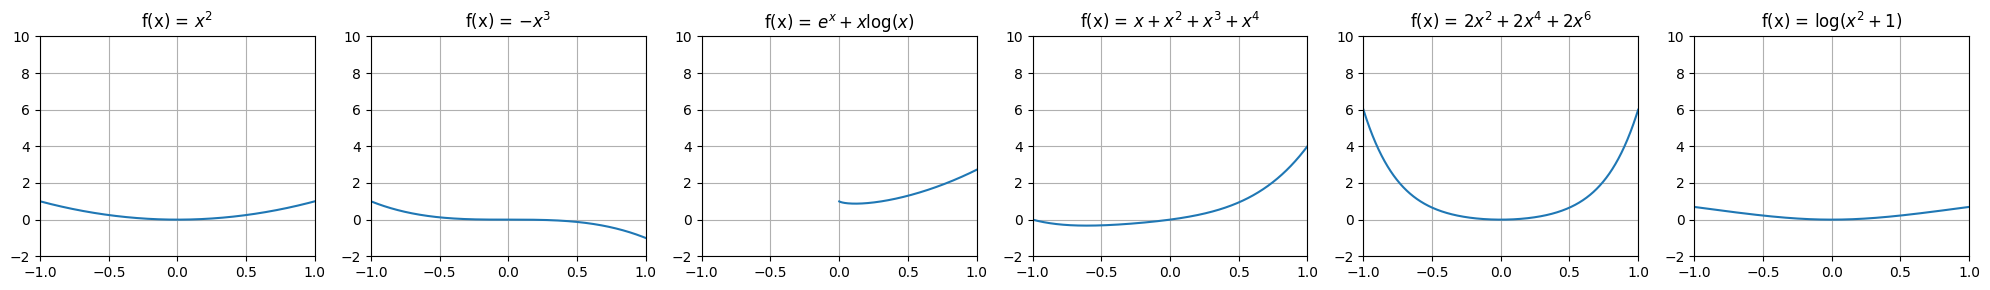

In [ ]:
x = np.linspace(-1, 1, 1000)

# Define the functions
f1 = x**2
f2 = -x**3
f3 = np.exp(x) + x * np.log(x)
f4 = x + x**2 + x**3 + x**4
f5 = 2*x**2 + 2*x**4 + 2*x**6
f6 = np.log(x**2 + 1)

# plot the functions
fig, axs = plt.subplots(1, 6, figsize=(20, 3))

axs[0].plot(x, f1)
axs[0].set_title('f(x) = $x^2$')
axs[0].grid(True)
axs[0].set_ylim([-2, 10])
axs[0].set_xlim([-1, 1])
axs[1].plot(x, f2)
axs[1].set_title('f(x) = $-x^3$')
axs[1].grid(True)
axs[1].set_ylim([-2, 10])
axs[1].set_xlim([-1, 1])
axs[2].plot(x, f3)
axs[2].set_title('f(x) = $e^x + x\log(x)$')
axs[2].grid(True)
axs[2].set_ylim([-2, 10])
axs[2].set_xlim([-1, 1])
axs[3].plot(x, f4)
axs[3].set_title('f(x) = $x + x^2 + x^3 + x^4$')
axs[3].grid(True)
axs[3].set_ylim([-2, 10])
axs[3].set_xlim([-1, 1])
axs[4].plot(x, f5)
axs[4].set_title('f(x) = $2x^2 + 2x^4 + 2x^6$')
axs[4].grid(True)
axs[4].set_ylim([-2, 10])
axs[4].set_xlim([-1, 1])
axs[5].plot(x, f6)
axs[5].set_title('f(x) = $\log(x^2 + 1)$')
axs[5].grid(True)
axs[5].set_ylim([-2, 10])
axs[5].set_xlim([-1, 1])



plt.tight_layout()
plt.show()

The first function f1 is convex over [−1,1].

The second function f2 is NOT convex over [−1,1].

The third function f3 is convex over [−1,1] when it is defined because X cannot equal 0 and the second derivative exp(x) + 1/x is convex over [−1,1] excluding 0.

The fourth function f4 is convex over [−1,1], second derivative is 2 + 6x + 12x^2.

The fifth function f5 is convex over [−1,1].

The sixth function f6 is convex over [−1,1].

## part 2 - Optimization in pytorch

Use pytorch and gradient descent to find the values that minimze of the following functions. You must write your own gradient descent loop but you can use pytorch's autodiff tools to find the gradients for you.

1. $f(x) = 500x^2$
2. $f(x) = x^4 \log(x^2 + 1)$
3. $f(x, y) = y^2(x \log(x^2 + 1) + x^3)$

In [ ]:
# 1
# Define function1
def func1(x):
    return 500 * (x ** 2)

# init parameter at 0.1 and enable gradient tracking
x = torch.tensor([0.1], requires_grad=True)

# Gradient descent loop
for _ in range(1000):
# Forward pass
    loss = func1(x)

# Backward pass
    loss.backward()

# Update the parameter
    x.data = x.data - 1e-3 * x.grad

# Zero the gradients
    x.grad.zero_()

print(x.data)

tensor([0.])


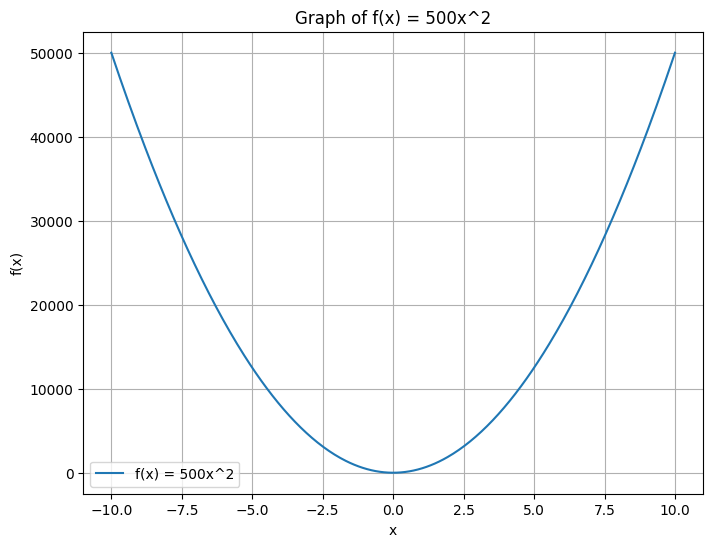

In [ ]:
#1 graph
x = np.linspace(-10, 10, 400)

# Calculate the y values based on the function
y = func1(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = 500x^2')
plt.title('Graph of f(x) = 500x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Function 1 minimum is 0

In [ ]:
# 2
# Define function2
def func2(x):
    return x ** 4 * torch.log((x ** 2) + 1)

# init parameter at 0.1 and enable gradient tracking
x = 0.1 * torch.ones(1)
x.requires_grad_()

# Keep a trace
loss = np.zeros(500000)
xval = np.zeros(500000)

# Gradient descent loop
for i in trange(500000):
    eval = func2(x)
    eval.backward()

# Update the parameter
    x.data = x.data - 10000e-1 * x.grad

# Zero the gradients
    x.grad.zero_()

    loss[i] = eval.data
    xval[i] = x.data

print(x.data)

  0%|          | 0/500000 [00:00<?, ?it/s]

tensor([0.0030])


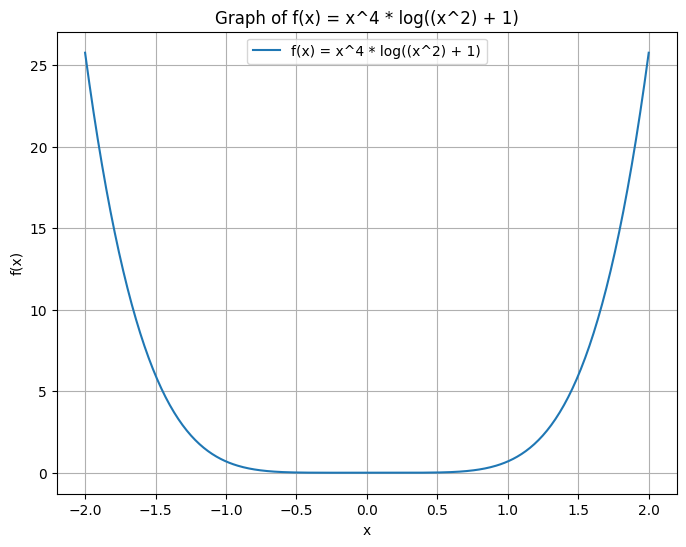

In [ ]:
# 2 graph
x = torch.linspace(-2, 2, 400)
y = func2(x)

y_np = y.detach().numpy()

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y_np, label='f(x) = x^4 * log((x^2) + 1)')
plt.title('Graph of f(x) = x^4 * log((x^2) + 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Checking xval as decent occurs
print(xval)

[0.04039673 0.03975197 0.039157   ... 0.00302091 0.0030209  0.0030209 ]


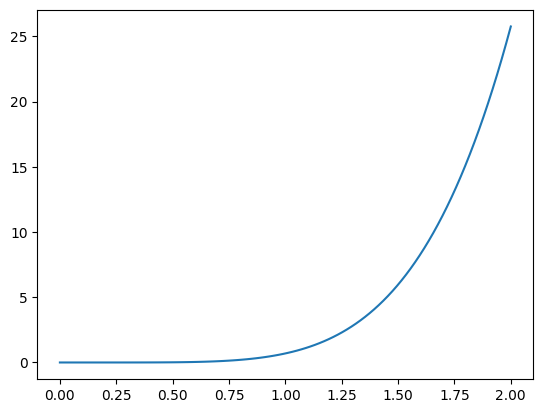

In [ ]:
# checking graph to see minimum
u = torch.tensor(np.linspace(1e-16, 2, 100))
v = func2(u)

plt.plot(u, v)

FOR Function 2 the minimum is clearly very close to 0

In [ ]:
# 3
# Define function3
def func3(xy):
    x, y = xy.unbind()
    return y ** 2 * (x * torch.log(x ** 2 + 1) + x ** 3)

# init parameter at 0.1 and enable gradient tracking
xy = torch.tensor([0.1, 0.1], requires_grad=True)

n_loss = np.zeros(100000)

# Gradient descent loop
for i in trange(100000):
# Forward pass
    eval = func3(xy)

# Backward pass
    eval.backward()

# Update the parameters
    xy.data = xy.data - 1000e-1 * xy.grad

# Zero the gradients
    xy.grad.zero_()

    n_loss[i] = eval.data


print(xy.data)

  0%|          | 0/100000 [00:00<?, ?it/s]

tensor([7.9230e-06, 5.0086e-02])


In [ ]:
print(n_loss)

[1.99503229e-05 4.70787228e-07 3.39689763e-07 ... 1.24777735e-18
 1.24774002e-18 1.24770259e-18]


For Function 3 the minimum is when x is approximately 0.

## part 3 - Global optimization

Suppose we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

1. Over what range of starting values $x_0$ will gradient descent be guaranteed to find the __global__ minimum? I.e. find the interval of $x$ values whos local minima is the global minima. You dont need to solve for this exactly, just estimate the range to the first decimal place.

2. What happens if we initialize outside this range and run gradient descent?

3. Use pytorch and gradient descent to find the global minimizer using a valid starting point.

1. From the 2nd graph plotted below the range of starting values gradiant descent will be guarenteed to find the global minimum is betwenn [-.2, -.1].

2. What could happen is we could converge to a different local minimum and therefore not the global minimum or we could have possible divergence where we overshoot the minima. I tried setting the starting point x0 to equal 2 and what I observed was that gradient descent coverged to a different local minimum where x is about 1.79 and f(x) is about 1.4 so it is very key to specify a starting point when finding the global minimum if we are dealing with a bunch of local minimums throughout the data.

3. The global minimized point is when x = -0.172 and f(x) = -1.840.



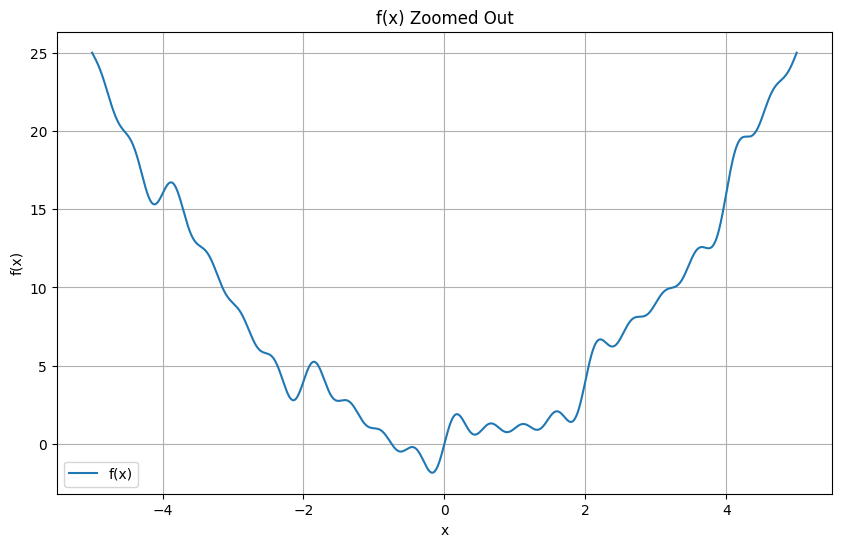

In [ ]:
# Graphing to solve 1
def fun(x):
    return x**2 + np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x) + 0.5*np.sin(3*np.pi*x) + 0.5*np.sin(4*np.pi*x)

# Generate a range of x values
x = np.linspace(-5, 5, 5000)
y = fun(x)
# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.title('f(x) Zoomed Out')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

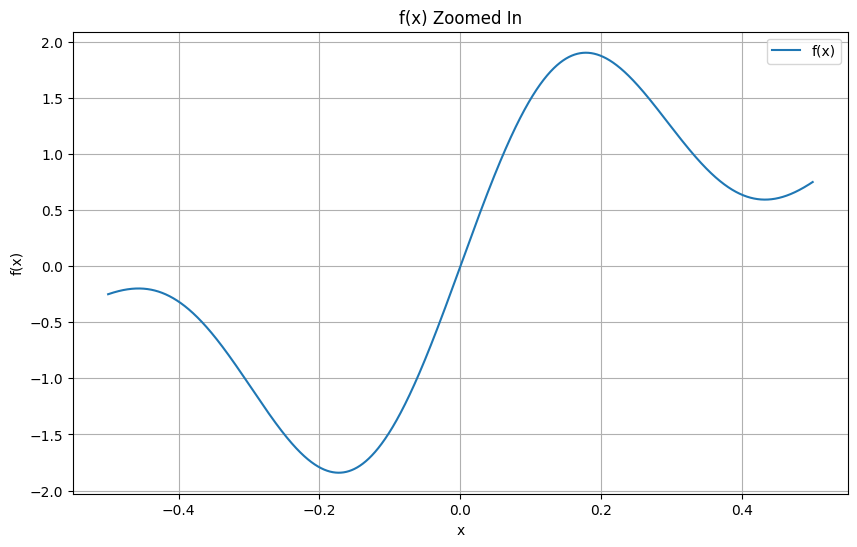

In [ ]:
# Graphing to solve 1
# Generate a new range of x values
x = np.linspace(-.5, .5, 5000)
y = fun(x)
# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.title('f(x) Zoomed In')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 2
# Define function
def f(x):
    return x**2 + torch.sin(np.pi*x) + 0.5*torch.sin(2*np.pi*x) + 0.5*torch.sin(3*np.pi*x) + 0.5*torch.sin(4*np.pi*x)

# staring point at x = 2
x0 = torch.tensor([2.0], requires_grad=True)

num_iterations = 1000

# Perform gradient descent
for i in trange(num_iterations):

# Zero the gradients from previous iterations
    if x0.grad is not None:
        x0.grad.zero_()

    y = f(x0)
    y.backward()

    with torch.no_grad():
        x0 -=  1e-4 * x0.grad

# The final value of x and f(x) after gradient descent
x_min = x0.item()
f_min = f(x0).item()

x_min, f_min


  0%|          | 0/1000 [00:00<?, ?it/s]

(1.7949331998825073, 1.4058222770690918)

In [ ]:
# 3 Correct Gradient Descent
# Define function
def f(x):
    return x**2 + torch.sin(np.pi*x) + 0.5*torch.sin(2*np.pi*x) + 0.5*torch.sin(3*np.pi*x) + 0.5*torch.sin(4*np.pi*x)

# Initialize x within [-0.2, -0.1]
x = torch.tensor([-0.15], requires_grad=True)

# Gradient Descent loop
for i in range(num_iterations):

# Zero gradients
    if x.grad is not None:
        x.grad.zero_()

# forward and backward pass
    eval = f(x)
    eval.backward()

# Update x
    with torch.no_grad():
        x -=  1e-4 * x.grad

# The final value of x and f(x) after gradient descent
new_x_min = x.item()
new_f_min = f(x).item()

# Print minimum point
new_x_min, new_f_min


(-0.17269238829612732, -1.8406997919082642)

## part 4 - modifying gradient descent

Suppose again that we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

This time, lets assume that we do not know what the valid starting points are. Think of a way to modify your gradient descent procedure to find the global minima of this function for any starting point in $[-2, 2]$. Implement your idea and test it on the starting points $\{-2, -1, 0, 1, 2\}$.
  - Couple of ideas to consider:
    1. High learning rates can help explore parameter space quickly. Low learning rates help convergence.
    2. Small amounts of noise added to the gradient updates can help jump out of local minima
    3. Repeated reinitialization might land you in the optimal starting zone by chance
    4. This function is close to a simple convex function, maybe the convex function's minima is close to this functions minima?

  - Describe the pros and cons of your solution in terms of how often you observe it converging to the correct value and how long it takes to run.
  - Do not cheat and manually reinitialize in the valid region you found in part 4.

My solution was to add small amounts of noise to the gradient descent at each update step and to add a learning rate decay that made the learning rate decrease by a .99 factor at each step. I added the noise to add variability in the algorithm so it could jump out of the small local minimum's and explore the paramter space more widely. I started the learning rate at 10e-1 and I added the learning rate decay to kind of complement the added noise because the noise adds wider exploration of the space. We know high learning rates can help explore parameter space quickly, while low learning rates help convergence, so by having the learning multiplicatively decrease at each step it allows for the algortithm to not overshoot and to start making smaller more precise adjustments over time.

PROS: The addition of noise to the gradient updates can hels the process escape local minima, allowing the gradient descent to explore lower minimums. Employing a decay in the learning rate allows the optimization to start with faster steps for paramterer exploration and then slow down for convergence as it approaches a minimum. The run time is very quick. At all starting points {−2,−1,0,1,2} the solution I found was getting very close to the correct minimum value.

CONS: Because of the noise I added, the process is not exactly reproducible and each time I run it the solution for the minimum that it finds is slightly different. I had to try a lot of different learning rate, added noise, and decay combinations before I found one that optimized really well so the large amount of parameter tuning needed is something I would say is a con.

Observations: For all starting points {−2,−1,0,1,2}, the optimization algorithm was very close to converging to the correct value each time I ran it once I found the proper learning rate to start at, error to add, and decay to use. Even though the minimum was slightly different each time I ran it, it was always very close. It also did not take very long to run it was roughly 2-3 seconds.

In [ ]:
# Define the function
def f(x):
    return x**2 + torch.sin(np.pi*x) + 0.5*torch.sin(2*np.pi*x) + 0.5*torch.sin(3*np.pi*x) + 0.5*torch.sin(4*np.pi*x)

# Gradient Descent with modifications like decay and adding noise
def gradient_descent(start_point, learning_rate= 10e-1, iterations=1000, decay=0.99, add_noise=1e-1):

    x = torch.tensor([start_point], dtype=torch.float32, requires_grad=True)
    best_x = x.item()
    best_f = f(x).item()

# Zero out gradient
    for i in trange(iterations):
        if x.grad is not None:
            x.grad.zero_()

        eval = f(x)
        eval.backward()

        with torch.no_grad():

# Add noise to the gradient update
            noise = add_noise * torch.randn_like(x.grad)
            x -= (learning_rate * x.grad) + noise

# Update the learning rate
            learning_rate *= decay

# Keep track of the best solution
        current_f = f(x).item()
        if current_f < best_f:
            best_x = x.item()
            best_f = current_f

    return best_x, best_f

# Starting points
starting_points = [-2, -1, 0, 1, 2]
results = []

for start in starting_points:
    best_x, best_f = gradient_descent(start)
    results.append((best_x, best_f))

# Display results
for start, result in zip(starting_points, results):
    print(f"Start point {start}, minimum at x = {result[0]} and f(x) = {result[1]}")


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Start point -2, minimum at x = -0.17393432557582855 and f(x) = -1.8405965566635132
Start point -1, minimum at x = -0.17430230975151062 and f(x) = -1.8405264616012573
Start point 0, minimum at x = -0.17786413431167603 and f(x) = -1.838918924331665
Start point 1, minimum at x = -0.17332659661769867 and f(x) = -1.8406728506088257
Start point 2, minimum at x = -0.17241060733795166 and f(x) = -1.8406943082809448


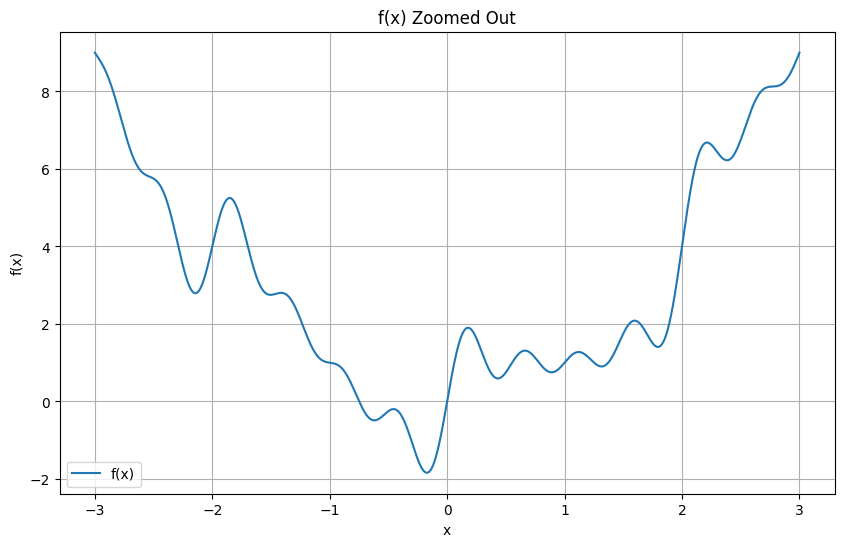

In [ ]:
# Graphing to help solve part 4
def fun(x):
    return x**2 + np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x) + 0.5*np.sin(3*np.pi*x) + 0.5*np.sin(4*np.pi*x)

# Generate a range of x values
x = np.linspace(-3, 3, 4000)
y = fun(x)
# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.title('f(x) Zoomed Out')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## part 5 - fitting models

Use pytorch to fit the following models to the provided data (do not change the data)

- $f(x) = \alpha + \beta_1 x$
- $g(x) = \alpha + \beta_1 x + \beta_2 x^2$
- $h(x) = \alpha + \beta_1 x  + \beta_2 x^2 + \beta_3 \sin(\beta_4 x)$

1. Each of these models represents a function from a certain model class. Which class is the largest and which is the smallest?
2. Which model should achieve the lowest training MSE? Which model should have highest training MSE?
3. Fit each model to the data using the MSE loss and compare their training MSEs. Which model actually achieved the lowest training MSE?
4. Evaluate each model on the test data. Which model had the lowest test MSE?


1. The Largest class is h(x)=α+β1x+β2x2+β3sin(β4x) because of the sin term. The smallest class is f(x)=α+β1x which is a simple linear model.

2. I think h(x) should have the lowest training MSE because it is the most complex model so it should be able to fit linear and non-linear patterns. f(x) should have the highest training MSE because it is a simple linear model and the graph shows the data is not much of a linear pattern.

3. The model that achieved the lowest training MSE was barely h(x) over g(x) but both were much better than f(x).

4. The model that achieved the lowest test MSE was actually g(x) barely over
h(x) and both were much lower than f(x).


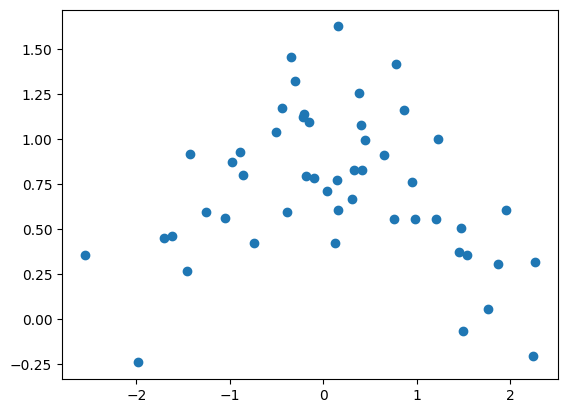

In [ ]:
np.random.seed(0)
x = np.random.normal(0, 1, [50, 1])
y = np.exp(-x**2/3) + np.random.normal(0, 1/3, [50, 1])

plt.scatter(x, y)

In [ ]:
# For model f(x)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# Convert to PyTorch
x_train = torch.tensor(x_train, dtype=torch.float64)
y_train = torch.tensor(y_train, dtype=torch.float64)
x_test = torch.tensor(x_test, dtype=torch.float64)
y_test = torch.tensor(y_test, dtype=torch.float64)

# MSE Loss function
def mse_loss(x, y):
    return torch.mean((y - x) ** 2)

# Training Settings
learning_rate = 1e-1
iter = 1000

In [ ]:
# Define linear Model f(x)
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.alpha = torch.randn(1, requires_grad=True)
        self.beta1 = torch.randn(1, requires_grad=True)

    def forward(self, x):
        return self.alpha + self.beta1 * x

# Model f(x)
model = LinearModel()

# Tracking loss
training_losses = []
testing_losses = []

# Training Loop
for i in range(iter):
    model.train()
    output = model(x_train)
    loss = mse_loss(output, y_train)

# Backward pass
    loss.backward()

# update of parameters
    with torch.no_grad():
        model.alpha -= learning_rate * model.alpha.grad
        model.beta1 -= learning_rate * model.beta1.grad

  # Zero the gradients
        model.alpha.grad.zero_()
        model.beta1.grad.zero_()

  # Record the training loss
    training_losses.append(loss.item())

  # Record the testing loss
    model.eval()
    with torch.no_grad():
        test_output = model(x_test)
        test_loss = mse_loss(test_output, y_test).item()
        testing_losses.append(test_loss)

# Print training and testing MSE
print(f"Final Training MSE for f(x): {training_losses[-1]}")
print(f"Final Testing MSE for f(x): {testing_losses[-1]}")

Final Training MSE for f(x): 0.17948120203329582
Final Testing MSE for f(x): 0.13770752733106836


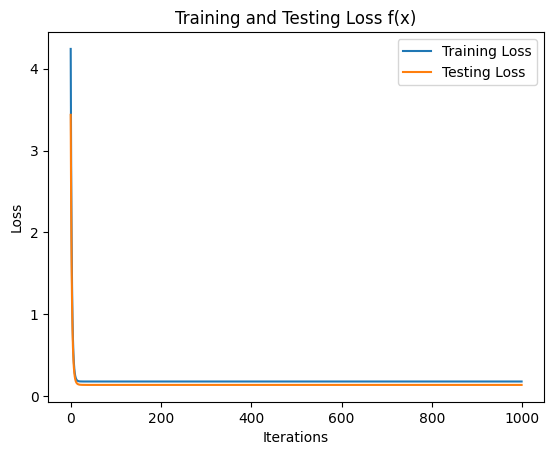

In [ ]:
# Plotting the training and testing losses for f(x)
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss f(x)')
plt.legend()
plt.show()

In [ ]:
# Gradient f(x)
model.alpha.data, model.beta1.data

(tensor([0.7365]), tensor([0.0019]))

In [ ]:
# Define the model for g(x)
class QuadraticModel(torch.nn.Module):
    def __init__(self):
        super(QuadraticModel, self).__init__()
        self.alpha = torch.randn(1, requires_grad=True)
        self.beta1 = torch.randn(1, requires_grad=True)
        self.beta2 = torch.randn(1, requires_grad=True)

    def forward(self, x):
        return self.alpha + self.beta1 * x + self.beta2 * x**2

#  Model for g(x)
model_g = QuadraticModel()

# Tracking loss
training_losses_g = []
testing_losses_g = []

# Training Loop
for i in range(iter):
    model_g.train()
    output = model_g(x_train)
    loss = mse_loss(output, y_train)

# Backward pass
    loss.backward()

# update params
    with torch.no_grad():
        model_g.alpha -= learning_rate * model_g.alpha.grad
        model_g.beta1 -= learning_rate * model_g.beta1.grad
        model_g.beta2 -= learning_rate * model_g.beta2.grad
# Zero gradients
        model_g.alpha.grad.zero_()
        model_g.beta1.grad.zero_()
        model_g.beta2.grad.zero_()

# Record the training loss
    training_losses_g.append(loss.item())

# Record the testing loss
    model_g.eval()
    with torch.no_grad():
        test_output = model_g(x_test)
        test_loss = mse_loss(test_output, y_test).item()
        testing_losses_g.append(test_loss)

# Print training and testing MSE
print(f"Final Training MSE for g(x): {training_losses_g[-1]}")
print(f"Final Testing MSE for g(x): {testing_losses_g[-1]}")

Final Training MSE for g(x): 0.10120097625448872
Final Testing MSE for g(x): 0.06998715107889077


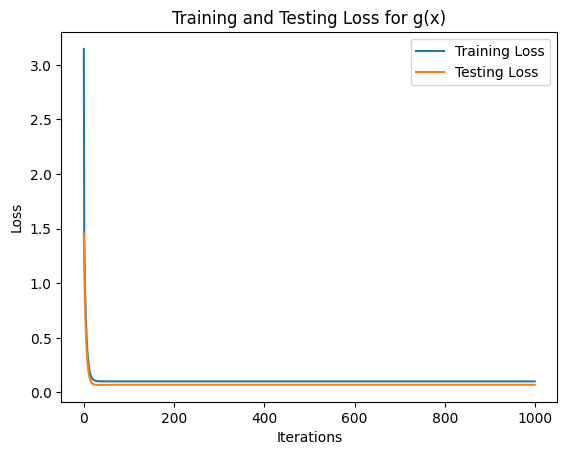

In [ ]:
# plot losses g(x)
plt.plot(training_losses_g, label='Training Loss')
plt.plot(testing_losses_g, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss for g(x)')
plt.legend()
plt.show()

In [ ]:
# Estimates
model_g.alpha.data, model_g.beta1.data, model_g.beta2.data

(tensor([0.9689]), tensor([-0.0025]), tensor([-0.1726]))

In [ ]:
# Define the model for h(x)
class SinModel(torch.nn.Module):
    def __init__(self):
        super(SinModel, self).__init__()
        self.alpha = torch.randn(1, requires_grad=True)
        self.beta1 = torch.randn(1, requires_grad=True)
        self.beta2 = torch.randn(1, requires_grad=True)
        self.beta3 = torch.randn(1, requires_grad=True)
        self.beta4 = torch.randn(1, requires_grad=True)

    def forward(self, x):
        return self.alpha + self.beta1 * x + self.beta2 * x**2 + self.beta3 * torch.sin(self.beta4 * x)

#Model for h(x)
model_h = SinModel()

# Loss Tracking
training_losses_h = []
testing_losses_h = []

# Training Loop
for i in range(iter):
    model_h.train()
    output = model_h(x_train)
    loss = mse_loss(output, y_train)

# Backward pass
    loss.backward()

# update params
    with torch.no_grad():
        model_h.alpha -= learning_rate * model_h.alpha.grad
        model_h.beta1 -= learning_rate * model_h.beta1.grad
        model_h.beta2 -= learning_rate * model_h.beta2.grad
        model_h.beta3 -= learning_rate * model_h.beta3.grad
        model_h.beta4 -= learning_rate * model_h.beta4.grad
# zero dradients
        model_h.alpha.grad.zero_()
        model_h.beta1.grad.zero_()
        model_h.beta2.grad.zero_()
        model_h.beta3.grad.zero_()
        model_h.beta4.grad.zero_()

# Record the training loss
    training_losses_h.append(loss.item())

# Record the testing loss
    model_h.eval()
    with torch.no_grad():
        test_output = model_h(x_test)
        test_loss = mse_loss(test_output, y_test).item()
        testing_losses_h.append(test_loss)

# tTraining and testing MSE
print(f"Final Training MSE for h(x): {training_losses_h[-1]}")
print(f"Final Testing MSE for h(x): {testing_losses_h[-1]}")

Final Training MSE for h(x): 0.09841809283526429
Final Testing MSE for h(x): 0.07417818359635256


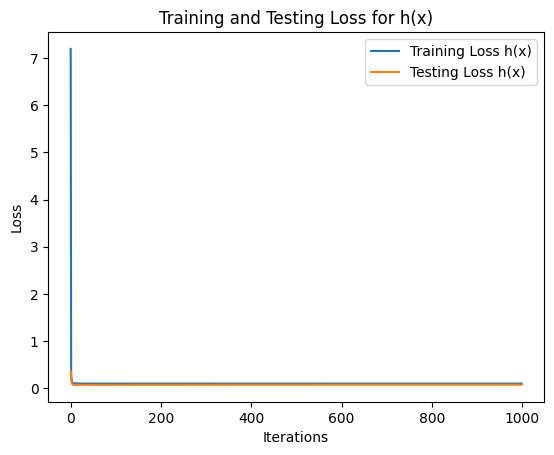

In [ ]:
# Plot losses h(x)
plt.plot(training_losses_h, label='Training Loss h(x)')
plt.plot(testing_losses_h, label='Testing Loss h(x)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss for h(x)')
plt.legend()
plt.show()

In [ ]:
# Estimates)
model_h.alpha.data, model_h.beta1.data, model_h.beta2.data, model_h.beta3.data, model_h.beta4.data

(tensor([0.9673]),
 tensor([-0.5005]),
 tensor([-0.1799]),
 tensor([-1.0970]),
 tensor([-0.5343]))

# Q4 - Application

You are in charge of monitoring air quality in Italy. Your job is to predict the concentration of CO, C6H6, NOx, and NO2 based on sensor readings of temperature, humidity, and various other gas concentrations. Use the following dataset to build a single linear regression model that uses the 9 features to predict the 4 targets. Verify that your model has converged on train and that it generalizes to validation (each loss < 0.03). When you have settled on an optimal model, check and report the loss on train, test, and validation and compare these numbers.

_hint: consider a low learning rate and long training time_

Here is the loss on train, test and validation: Final Training Loss: 0.02164,
Final Validation Loss: 0.02398, Final Test Loss: 0.02127. Since all of the losses are < .03 and are all very close to each other I can say that the model generalizes well, and there are not any signs of overfitting.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
x = air_quality.data.features
x = x.dropna()

# separate into actual features and targets
y = torch.tensor(np.array(x.loc[:,['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]))
x = torch.tensor(np.array(x.drop(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], axis = 1)))

# rescale
x = torch.exp(x/1000)
y = torch.exp(y/1000)

# train, test, val
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

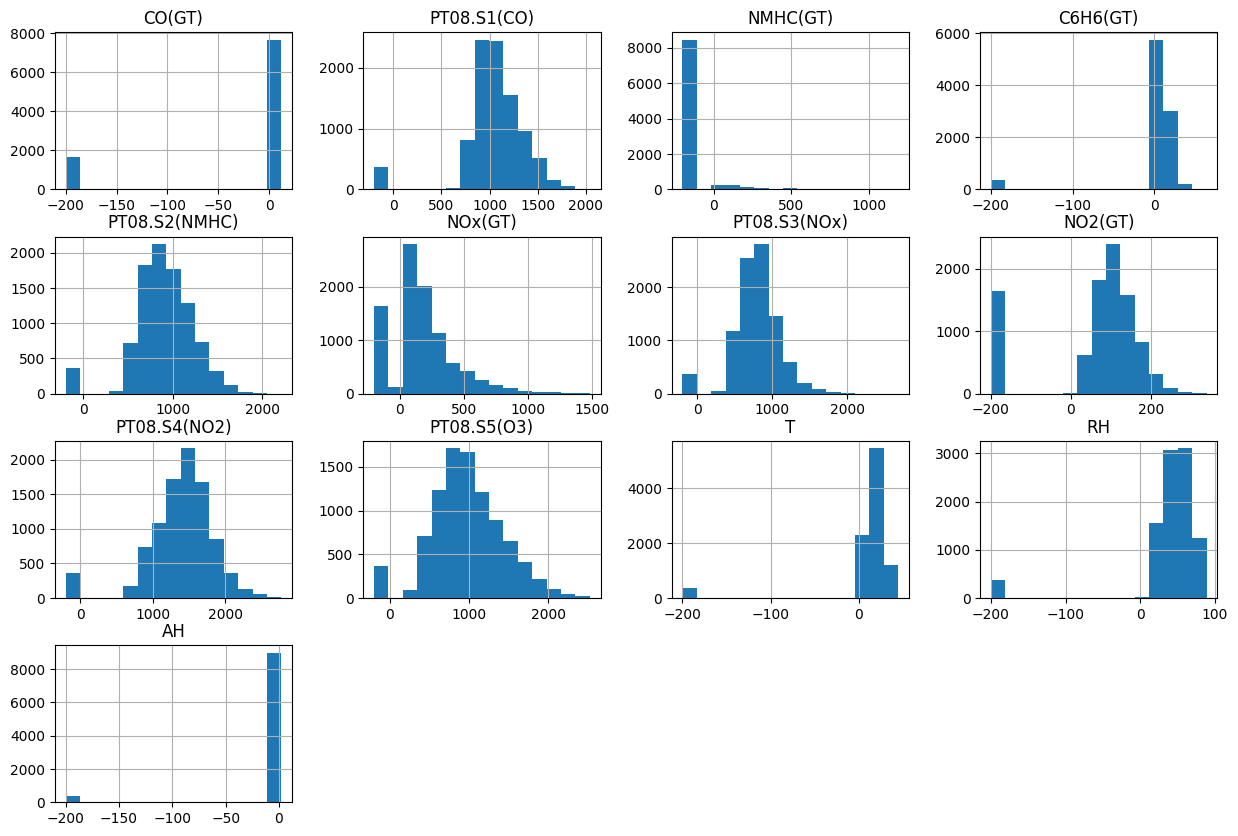

In [ ]:
# Doing some exploration
df = air_quality.data.features
df = df.dropna()

print(df.head())

df.hist(bins=15, figsize=(15, 10))
plt.show()

In [ ]:
import torch.nn as nn

# Defining the single linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(9, 4)

    def forward(self, x):
        return self.linear(x)

def mse_loss(pred, target):
    return torch.mean((pred - target) ** 2)

In [ ]:
# Initialize linear regression
model = LinearRegressionModel()

# Training settings
learning_rate = 1e-2
iterations = 10000

# Convert data for PyTorch
xtrain = xtrain.float()
ytrain = ytrain.float()
xval = xval.float()
yval = yval.float()
xtest = xtest.float()
ytest = ytest.float()

# tracking losses
training_losses = []
validation_losses = []

# Training loop
for i in trange(iterations):
    model.train()
    y_pred = model(xtrain)
    loss = mse_loss(y_pred, ytrain)

    # Backward pass and update
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    model.zero_grad()

    # Track training loss
    training_losses.append(loss.item())

    # Track validation loss
    model.eval()
    with torch.no_grad():
        y_val_pred = model(xval)
        val_loss = mse_loss(y_val_pred, yval).item()
        validation_losses.append(val_loss)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# Evaluating the model losses
model.eval()
with torch.no_grad():
    y_pred_train = model(xtrain)
    final_train_loss = mse_loss(y_pred_train, ytrain).item()
    y_pred_val = model(xval)
    final_val_loss = mse_loss(y_pred_val, yval).item()
    y_pred_test = model(xtest)
    final_test_loss = mse_loss(y_pred_test, ytest).item()

print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Test Loss: {final_test_loss}")

Final Training Loss: 0.021649980917572975
Final Validation Loss: 0.023982802405953407
Final Test Loss: 0.021272238343954086


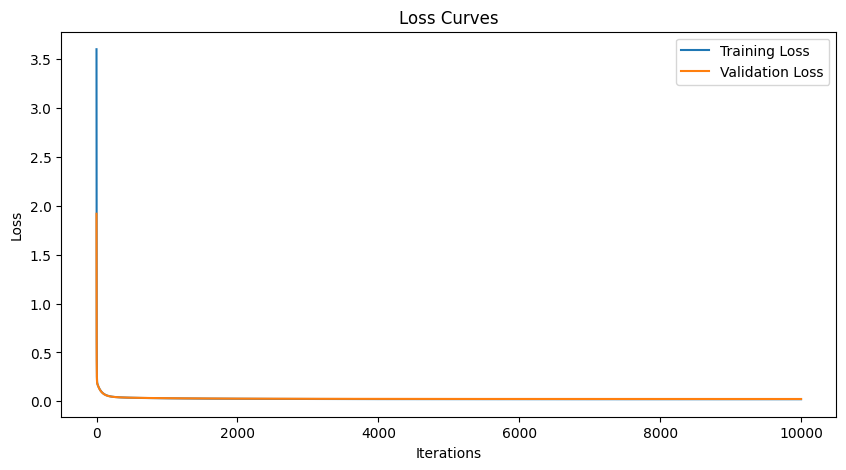

In [ ]:
# Plotting the loss curves to check convergence
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


In [ ]:
# See parameter coefficient estimated values
for name, param in model.named_parameters():
    print(f'{name}: {param.data}')

linear.weight: tensor([[-0.0337,  0.2018,  0.0152, -0.0227, -0.0154,  0.0124,  0.2167,  0.4269,
          0.1915],
        [ 0.0028,  0.0407,  0.0396,  0.0110, -0.0079, -0.0054,  0.5366, -0.0187,
          0.0727],
        [-0.0767,  0.1195,  0.2333, -0.0776, -0.1279,  0.1487,  0.3030,  0.1909,
          0.2266],
        [-0.0199,  0.1763,  0.0458, -0.0421, -0.0360,  0.0258,  0.4023,  0.1360,
          0.2838]])
linear.bias: tensor([0.0865, 0.2867, 0.3262, 0.2079])
